# **CO2 Emissions Prediction: Data Preprocessing**

**Author:** Cynthia Francis  
---

## 📌 Project Scope

This notebook is part of a project that aims to build a predictive model for **CO2 emissions of cars** sold in France in 2014.  
The dataset includes:
- Fuel consumption
- CO2 emissions
- Air pollutant emissions (as per Euro standard)
- Vehicle technical characteristics (brand, model, engine type, etc.)

The goal of this notebook is to:
- Download or load the dataset
- Perform initial exploration
- Clean and preprocess the data for modeling

# 📊 Dataset Overview

As part of this project, I downloaded the dataset:

**📁 Title:**  
**[2014] Emissions de polluants, CO2 et caractéristiques des véhicules commercialisés en France**

📍 Available on [data.gouv.fr](https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/)  
📄 Accompanied by a variable dictionary: **Dictionnaire des variables**  
🔓 License: [Etalab Open License](https://www.etalab.gouv.fr/wp-content/uploads/2014/05/Licence_Ouverte.pdf)

---

## 🗂️ Source and Context

The data comes from the **vehicle approval services of automobile manufacturers**.

ADEME (the French Agency for Ecological Transition) acquires the data from the  
**Union Technique de l’Automobile, du Motocycle et du Cycle (UTAC)**,  
which is responsible for the approval of vehicles before they are released on the market.  
This process is carried out in collaboration with the **Ministry of Sustainable Development**.

---

## 🔍 What the Dataset Includes

For each vehicle, the original data provided by UTAC includes:

- **Fuel consumption**
- **Carbon dioxide (CO₂) emissions**
- **Air pollutant emissions**, regulated under the **Euro standard**
- **Complete technical specifications** of the vehicle, such as:
  - Vehicle range
  - Brand and model
  - CNIT number (unique vehicle ID)
  - Type of energy/fuel used (e.g., diesel, petrol, electric)

---

This dataset provides a rich basis for building a predictive model of CO₂ emissions and exploring the environmental impact of vehicle characteristics in the French car market.

In [98]:
# ----------------------------------------
# 📥 Import necessary libraries
# ----------------------------------------
import pandas as pd

# ----------------------------------------
# 📂 Load the French car emissions dataset and its dictionary
# ----------------------------------------
# - sep=';' because the CSV uses semicolon delimiters (common in French-format CSVs)
# - encoding='latin1' handles French special characters (accents, etc.)
cars_df = pd.read_csv('data/mars-2014-complete.csv', sep=';', encoding='latin1')
dictionary_df = pd.read_excel('data/carlab-annuaire-variable.xlsx')

# ----------------------------------------
# 👀 Preview the datasets
# ----------------------------------------
display(cars_df.head())
display(dictionary_df.head())



,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


,nom-colonne,typerubrique,longueur,légende,unité
0,lib_mrq_utac,varchar,12,la marque,NaN
1,lib_mod_doss,varchar,20,le modele du dossier,NaN
2,lib_mod,varchar,20,le modèle commercial,NaN
3,dscom,varchar,91,la désignation commerciale,NaN
4,cnit,varchar,15,le Code National d'Identification du Type (CNIT),NaN



# Variable Glossary 

## 🚘 Vehicle Identification

| Column Name       | Description                         |
|-------------------|-------------------------------------|
| `lib_mrq_utac`    | Brand (e.g., Renault, Peugeot)      |
| `lib_mod_doss`    | Model name (e.g., Clio, 208)        |
| `lib_mod`         | Commercial model name               |
| `dscom`           | Commercial description              |
| `cnit`            | CNIT code: official vehicle type identifier in France |
| `tvv`             | Vehicle type/version code           |
| `cod_cbr`         | Fuel type (e.g., diesel, petrol)    |
| `gamme`           | Vehicle range/class (compact, SUV)  |
| `Carrosserie`     | Body type (sedan, hatchback, etc.)  |

---

## ⚡ Power & Engine

| Column Name         | Description                                      |
|---------------------|--------------------------------------------------|
| `hybride`           | Whether the car is a hybrid (O/N)                |
| `puiss_admin_98`    | Administrative power (used for taxes)           |
| `puiss_max`         | Maximum power (in kilowatts)                     |
| `typ_boite_nb_rapp` | Gearbox type and number of gears                 |

---

## ⛽ Fuel Consumption

| Column Name     | Description                                  |
|-----------------|----------------------------------------------|
| `conso_urb`     | Urban fuel consumption (L/100 km)            |
| `conso_exurb`   | Extra-urban fuel consumption (L/100 km)      |
| `conso_mixte`   | Combined (average) fuel consumption (L/100 km) |

---

## 🌍 Pollution & Emissions

| Column Name  | Description                          |
|--------------|--------------------------------------|
| `co2`        | CO₂ emissions (g/km)                 |
| `co_typ_1`   | CO type I emissions (g/km)           |
| `hc`         | Hydrocarbon emissions (g/km)         |
| `nox`        | Nitrogen oxide emissions (g/km)      |
| `hcnox`      | Combined HC + NOx emissions (g/km)   |
| `ptcl`       | Particle emissions (g/km)            |

---

## ⚖️ Weight

| Column Name       | Description                       |
|-------------------|-----------------------------------|
| `masse_ordma_min` | Minimum curb weight (kg)          |
| `masse_ordma_max` | Maximum curb weight (kg)          |

---

## 🧾 Registration / Metadata

| Column Name  | Description                                                        |
|--------------|--------------------------------------------------------------------|
| `champ_v9`   | Field containing EURO emissions standard info                      |
| `date_maj`   | Last update date                                                   |


In [77]:
# ----------------------------------------
# Display dataset info
# ----------------------------------------
print(cars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  hc                 977

In [99]:
# ----------------------------------------
# Remove empty columns 26 to 29 
# ----------------------------------------
cars_df.drop(labels=['Unnamed: 27', 'Unnamed: 26', 'Unnamed: 28', 'Unnamed: 29'], axis=1, inplace=True)
display(cars_df.head())

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,NaN,"0,164000005","0,193000004","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER


# Data Exploration

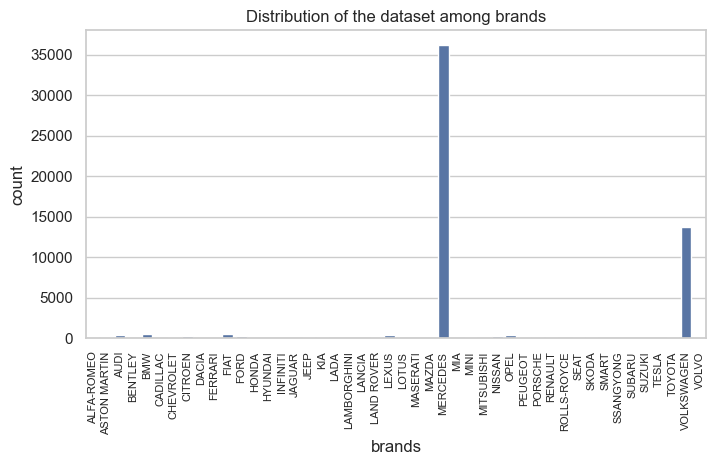

In [100]:
# ----------------------------------------  
# Feature Observation
# ----------------------------------------  

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of samples among car brands
fig = plt.figure(figsize=(8, 4))
sns.countplot(data=cars_df, x=cars_df.lib_mrq)
plt.xticks(rotation=90, size=8)
plt.xlabel('brands')
plt.title('Distribution of the dataset among brands')
plt.show()


🔎 We can clearly observe that **MERCEDES** and **VOLKSWAGEN** are overrepresented in the dataset.  To better understand this overrepresentation, let’s first **zoom in on MERCEDES** and explore the distribution of its vehicles.


In [101]:
# Display type of cars represented for Mercedes
print('Distribution within MERCEDES samples')
print(cars_df.Carrosserie[cars_df.lib_mrq == 'MERCEDES'].value_counts())
print('\n')

# display unique MERCEDES commercial model and CNIT codes
print('# of unique commercial model: {}'.format(cars_df.dscom[cars_df.lib_mrq == 'MERCEDES'].nunique()))
print('# of unique CNIT code: {}'.format(cars_df.cnit[cars_df.lib_mrq == 'MERCEDES'].nunique()))

Distribution within MERCEDES samples
Carrosserie
MINIBUS                32076
BERLINE                 2154
BREAK                    685
COUPE                    443
TS TERRAINS/CHEMINS      402
CABRIOLET                268
MONOSPACE COMPACT        180
COMBISPACE                12
Name: count, dtype: int64


# of unique commercial model: 305
# of unique CNIT code: 36208


It appears that MERCEDES registered many different versions for what seem to be similar models. These versions likely share the same characteristics, resulting in duplicated rows within the dataset.

In [102]:
# Remove columns with identical or redundant information
cars_df.drop(labels=['cnit', 'tvv'], axis=1, inplace=True)

# Count the number of duplicated rows in the dataset
print('Number of duplicated rows:')
print(cars_df.duplicated().value_counts())


Number of duplicated rows:
True     46406
False     8638
Name: count, dtype: int64


As expected, we find duplicated rows in the dataset. It appears that this issue is not unique to Mercedes, so let's proceed to remove all duplicate entries.

<class 'pandas.core.frame.DataFrame'>
Index: 8638 entries, 0 to 55043
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            8638 non-null   object 
 1   lib_mod_doss       8638 non-null   object 
 2   lib_mod            8638 non-null   object 
 3   dscom              8638 non-null   object 
 4   cod_cbr            8638 non-null   object 
 5   hybride            8638 non-null   object 
 6   puiss_admin_98     8638 non-null   int64  
 7   puiss_max          8638 non-null   object 
 8   typ_boite_nb_rapp  8638 non-null   object 
 9   conso_urb          8604 non-null   object 
 10  conso_exurb        8604 non-null   object 
 11  conso_mixte        8613 non-null   object 
 12  co2                8613 non-null   float64
 13  co_typ_1           8533 non-null   object 
 14  hc                 3485 non-null   object 
 15  nox                8533 non-null   object 
 16  hcnox              5078 non-

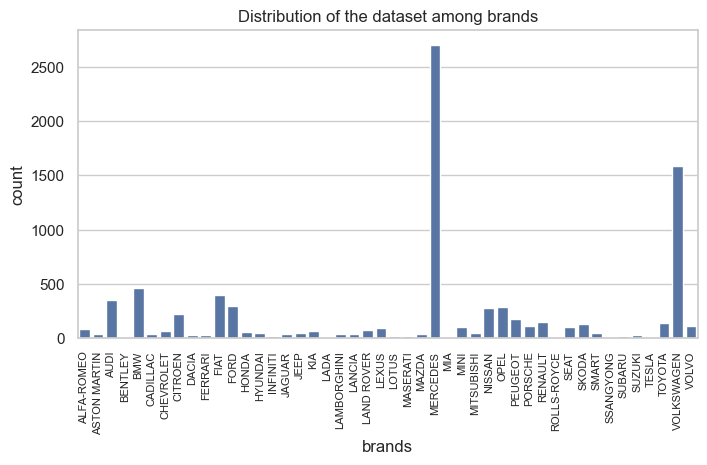

In [103]:
# Remove duplicate rows
cars_df.drop_duplicates(inplace=True)

# Check the new dataset 
print(cars_df.info())

# Plot again the distribution of samples among brands
fig = plt.figure(figsize=(8, 4))
sns.countplot(data=cars_df, x=cars_df.lib_mrq)
plt.xticks(rotation=90, size=8)
plt.xlabel('brands')
plt.title('Distribution of the dataset among brands')
plt.show()

The dataset now has a more balanced distribution across brands, although Mercedes and Volkswagen are still more prominently represented.

In [104]:
# Convert some columns to floats
col_to_convert = ['puiss_max', 'conso_urb', 'conso_exurb', 'conso_mixte']
for col in col_to_convert:
    cars_df[col] = cars_df[col].str.replace(',', '.').astype('float')

# Check the modification
print(cars_df[col_to_convert].head())
print('\n')
print(cars_df[col_to_convert].info())

   puiss_max  conso_urb  conso_exurb  conso_mixte
0      147.0       11.3          5.8          7.8
1      147.0       11.5          6.0          8.0
2      100.0        6.6          4.2          5.1
4      125.0        6.9          4.3          5.3
6      125.0        6.6          4.3          5.1


<class 'pandas.core.frame.DataFrame'>
Index: 8638 entries, 0 to 55043
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   puiss_max    8638 non-null   float64
 1   conso_urb    8604 non-null   float64
 2   conso_exurb  8604 non-null   float64
 3   conso_mixte  8613 non-null   float64
dtypes: float64(4)
memory usage: 337.4 KB
None


Since this analysis focuses on CO₂ emissions, we can drop columns related to other measurements as well as date information.

In [105]:
# Remove extraneous measurement and date columns
col_to_remove1 = ['co_typ_1', 'hc', 'nox', 'hcnox', 'ptcl', 'date_maj']
cars_df.drop(labels=col_to_remove1, axis=1, inplace=True)

## ALSO DROP COLUMNS NOT DIRECTLY IMPACTING EMISSIONS

In [106]:
# Remove descriptive columns that do not directly impact emissions
col_to_remove2 = ['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom','champ_v9']
cars_df.drop(labels=col_to_remove2, axis=1, inplace=True)

In [ ]:
# Count how many rows have at least one missing value (before removal)
missing_row_count = cars_df.isnull().any(axis=1).sum()
print(f'Number of rows with missing values before removal: {missing_row_count}')


Number of rows with missing values before removal: 34


There are 34 rows in the dataset with missing values. Since this is a relatively small number compared to the overall dataset size (8638), we will remove these rows to ensure the data is complete for our analysis.

In [108]:
# Remove rows with missing values
cars_df.dropna(inplace=True)

# Check the resulting dataframe
display(cars_df.head(2))
print(cars_df.info())


,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max,Carrosserie,gamme
0,ES,non,12,147.0,M 6,11.3,5.8,7.8,182.0,1505,1505,BERLINE,MOY-SUPER
1,ES,non,12,147.0,M 6,11.5,6.0,8.0,186.0,1555,1555,BERLINE,MOY-SUPER


<class 'pandas.core.frame.DataFrame'>
Index: 8604 entries, 0 to 55043
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cod_cbr            8604 non-null   object 
 1   hybride            8604 non-null   object 
 2   puiss_admin_98     8604 non-null   int64  
 3   puiss_max          8604 non-null   float64
 4   typ_boite_nb_rapp  8604 non-null   object 
 5   conso_urb          8604 non-null   float64
 6   conso_exurb        8604 non-null   float64
 7   conso_mixte        8604 non-null   float64
 8   co2                8604 non-null   float64
 9   masse_ordma_min    8604 non-null   int64  
 10  masse_ordma_max    8604 non-null   int64  
 11  Carrosserie        8604 non-null   object 
 12  gamme              8604 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 941.1+ KB
None


### Numerical Features

count    8604.000000
mean      176.100651
std        49.947564
min        48.000000
25%       135.000000
50%       181.000000
75%       209.000000
max       572.000000
Name: co2, dtype: float64

Car(s) with the lowest CO2 emissions:


,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max,Carrosserie,gamme
55014,GL,oui,10,158.0,A 6,0.0,5.5,1.8,48.0,1949,1949,BREAK,SUPERIEURE



Car(s) with the highest CO2 emissions:


,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max,Carrosserie,gamme
197,ES,non,81,559.299988,A 6,41.099998,14.9,24.5,572.0,1815,1815,COUPE,LUXE


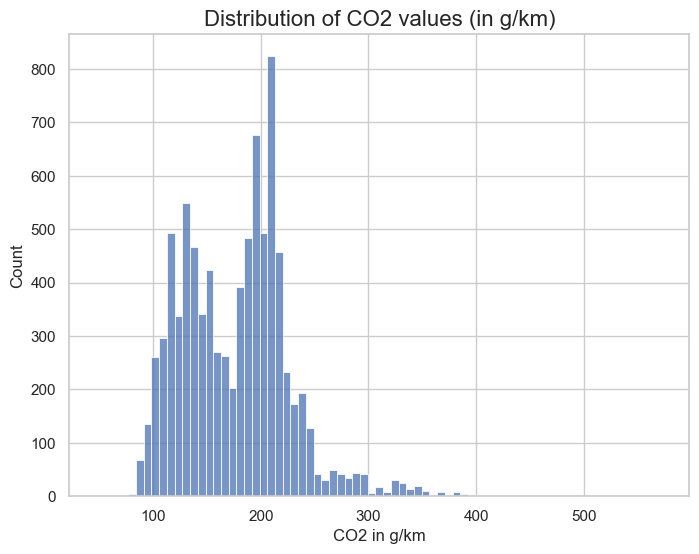

In [109]:
# Let's start by exploring the target variable 'co2'

# Plot the distribution of CO2 emissions
plt.figure(figsize=(8, 6))
sns.histplot(data=cars_df, x='co2')
plt.xlabel('CO2 in g/km')
plt.title('Distribution of CO2 values (in g/km)', size=16)

# Display descriptive statistics for CO2 emissions
print(cars_df.co2.describe())

# Display car) with the lowest CO2 emissions in the dataset
print('\nCar(s) with the lowest CO2 emissions:')
display(cars_df[cars_df.co2 == cars_df.co2.min()])

# Display car with the highest CO2 emissions in the dataset
print('\nCar(s) with the highest CO2 emissions:')
display(cars_df[cars_df.co2 == cars_df.co2.max()])
print('\n')


This distribution is clearly bimodal, indicating two main groups of vehicles—one with CO₂ emissions centered around 140g/km and another around 200g/km. There are also a few noticeable outliers with much higher emissions. Next, we will explore the distribution of other features and how they correlate with CO₂ values by plotting a heatmap.

array([[<Axes: title={'center': 'puiss_admin_98'}>,
        <Axes: title={'center': 'puiss_max'}>,
        <Axes: title={'center': 'conso_urb'}>],
       [<Axes: title={'center': 'conso_exurb'}>,
        <Axes: title={'center': 'conso_mixte'}>,
        <Axes: title={'center': 'co2'}>],
       [<Axes: title={'center': 'masse_ordma_min'}>,
        <Axes: title={'center': 'masse_ordma_max'}>, <Axes: >]],
      dtype=object)

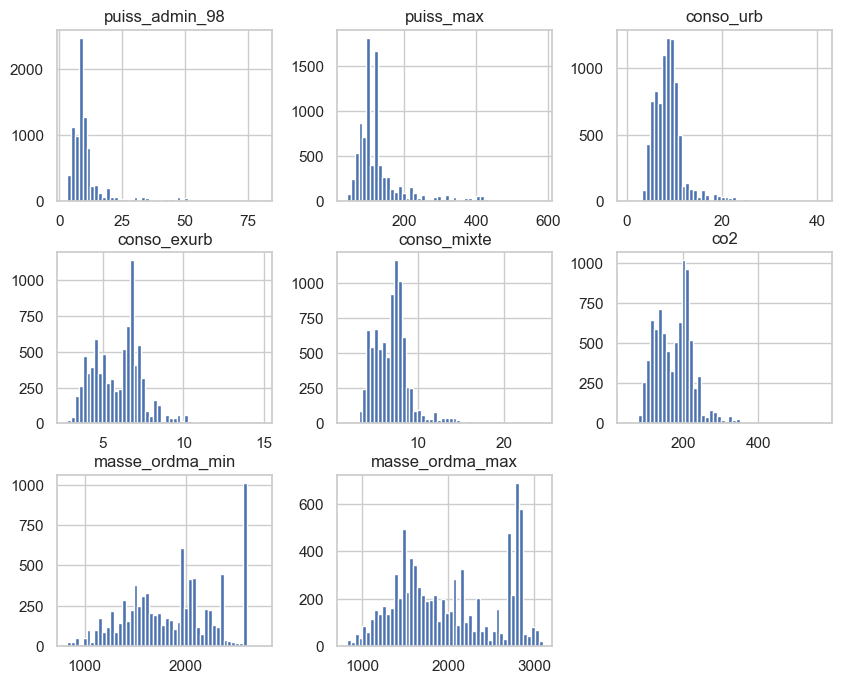

In [110]:
cars_df.hist(figsize=(10,8),bins=50)

Most vehicles in the dataset are mid-sized, moderately powered, and have average to good fuel efficiency

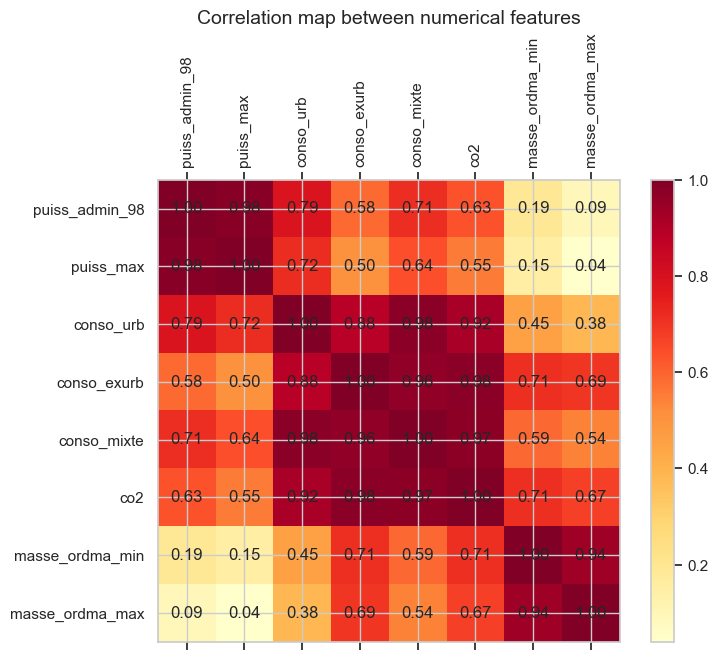

In [111]:
import numpy as np

# Select only numeric columns for correlation
numeric_df = cars_df.select_dtypes(include=[np.number])

# Plot the correlation map
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(numeric_df.corr(), cmap=plt.cm.YlOrRd)

# Display the correlation factors on the plot
for (x, y), value in np.ndenumerate(numeric_df.corr()):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")

# Set ticks and title
ax.set_xticks(range(len(numeric_df.columns)))
ax.set_xticklabels(numeric_df.columns, rotation=90)
ax.set_yticks(range(len(numeric_df.columns)))
ax.set_yticklabels(numeric_df.columns)
plt.title('Correlation map between numerical features', size=14)

plt.colorbar(cax)
plt.show()


If we focus on CO₂, we observe that it shows a generally strong correlation with all other features, which is promising for building a predictive model. Additionally, some features are highly correlated with one another. For instance:

‘masse_ordma_min’ and ‘masse_ordma_max’ have a correlation of 0.94,

‘puiss_admin_98’ and ‘puiss_max’ are correlated at 0.98,

‘conso_mixte’ is strongly correlated with both ‘conso_urb’ (0.98) and ‘conso_exurb’ (0.96).

These high correlations are expected based on the feature descriptions. Given this redundancy, we can consider removing some of the highly correlated features to improve readability and avoid multicollinearity.

In [112]:
cars_df['weight_diff'] = cars_df['masse_ordma_max'] - cars_df['masse_ordma_min']
print(cars_df['weight_diff'].describe())

count    8604.000000
mean      148.413645
std       232.600510
min         0.000000
25%         0.000000
50%         0.000000
75%       219.250000
max       833.000000
Name: weight_diff, dtype: float64


The dataset provides both minimum and maximum curb weights for each vehicle, representing the lightest and heaviest configurations of a given model. Analysis shows that while 50% of vehicles have no difference between the two, the average difference is significant (~148 kg), and for some models, the range is very large (up to 833 kg). To capture this meaningful variability while avoiding multicollinearity,  instead of dropping on feature and keeping the other, we compute the average of the two as a new feature `masse_ordma_avg` and drop the originals.


In [113]:
# Create average curb weight column
cars_df['masse_ordma_avg'] = cars_df[['masse_ordma_min', 'masse_ordma_max']].mean(axis=1)

# Drop the original min and max curb weight columns
cars_df = cars_df.drop(columns=['masse_ordma_min', 'masse_ordma_max'])


In [114]:
# Remove columns with high correlation between other features
col_high_corr_to_remove = ['puiss_max', 'conso_mixte','weight_diff']
cars_df.drop(labels=col_high_corr_to_remove, axis=1, inplace=True)

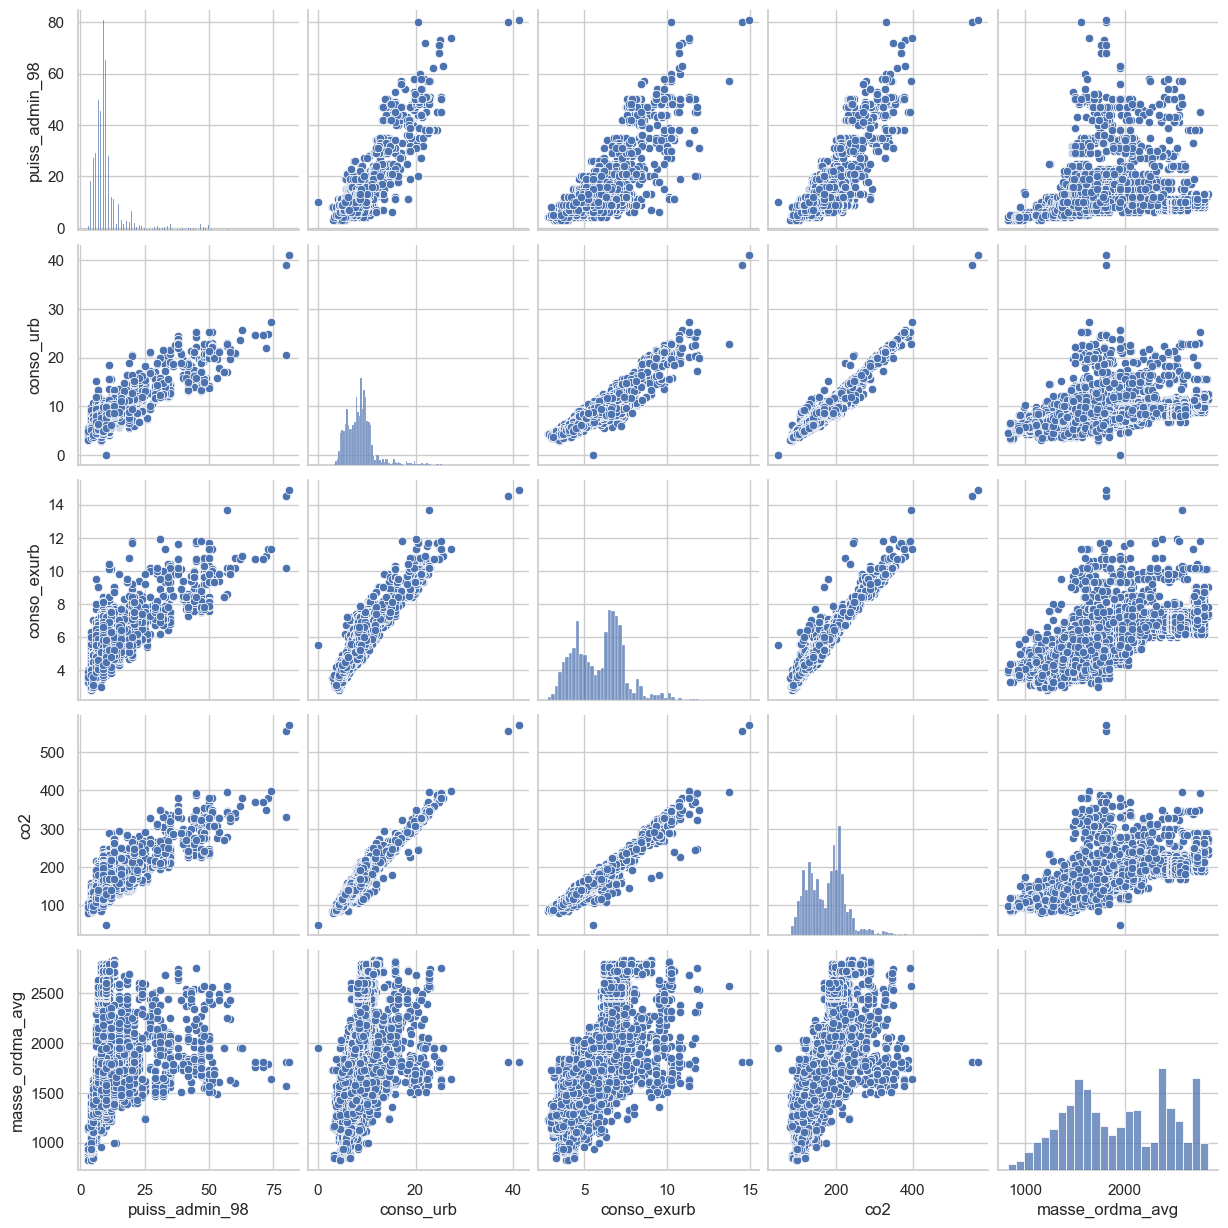

In [115]:
# Plot a pairplot to have an overview of all the numerical features
sns.pairplot(cars_df)
plt.show()

As shown in the correlation map and by looking at the plots, CO₂ is well correlated with several features in our dataset.

In [116]:
cars_df.head()

,cod_cbr,hybride,puiss_admin_98,typ_boite_nb_rapp,conso_urb,conso_exurb,co2,Carrosserie,gamme,masse_ordma_avg
0,ES,non,12,M 6,11.3,5.8,182.0,BERLINE,MOY-SUPER,1505.0
1,ES,non,12,M 6,11.5,6.0,186.0,BERLINE,MOY-SUPER,1555.0
2,GO,non,7,M 6,6.6,4.2,134.0,BERLINE,MOY-SUPER,1565.0
4,GO,non,9,M 6,6.9,4.3,139.0,BERLINE,MOY-SUPER,1565.0
6,GO,non,9,M 6,6.6,4.3,136.0,BERLINE,MOY-SUPER,1565.0


### Categorical Features

In [117]:
# Split 'typ_boite_nb_rapp' into two columns: 'gearbox_type' and 'num_gears'
cars_df[['gearbox_type', 'num_gears']] = cars_df['typ_boite_nb_rapp'].str.split(' ', expand=True)

# Convert number of gears to integer (some may need handling if missing)
cars_df['num_gears'] = pd.to_numeric(cars_df['num_gears'], errors='coerce')  # NaN if missing


In [118]:
cars_df.head()

,cod_cbr,hybride,puiss_admin_98,typ_boite_nb_rapp,conso_urb,conso_exurb,co2,Carrosserie,gamme,masse_ordma_avg,gearbox_type,num_gears
0,ES,non,12,M 6,11.3,5.8,182.0,BERLINE,MOY-SUPER,1505.0,M,6.0
1,ES,non,12,M 6,11.5,6.0,186.0,BERLINE,MOY-SUPER,1555.0,M,6.0
2,GO,non,7,M 6,6.6,4.2,134.0,BERLINE,MOY-SUPER,1565.0,M,6.0
4,GO,non,9,M 6,6.9,4.3,139.0,BERLINE,MOY-SUPER,1565.0,M,6.0
6,GO,non,9,M 6,6.6,4.3,136.0,BERLINE,MOY-SUPER,1565.0,M,6.0


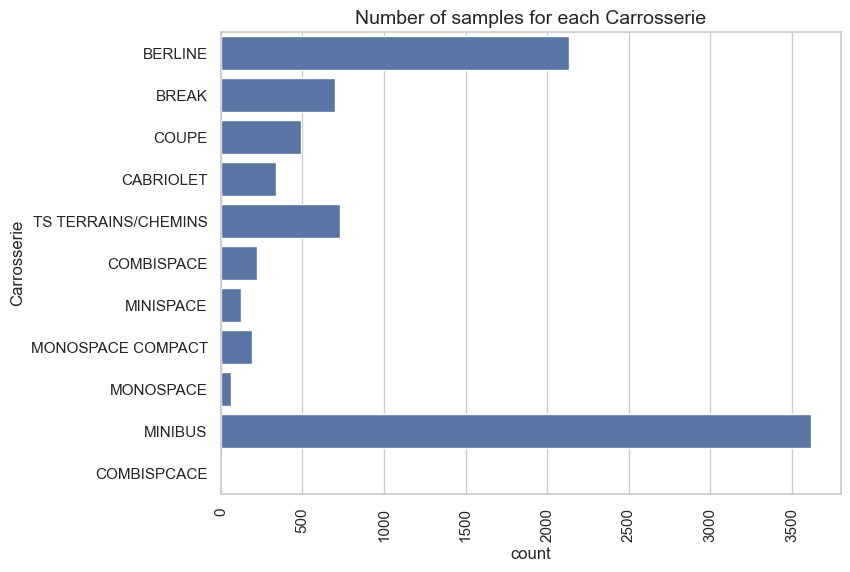

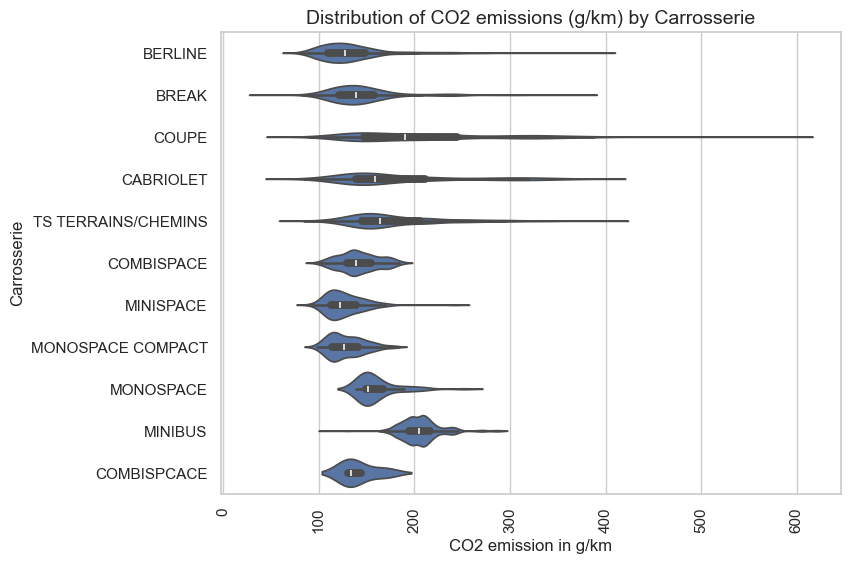

In [119]:
# Plot the sample count for each vehicle body type ("Carrosserie")
plt.figure(figsize=(8,6))
sns.countplot(data=cars_df, y='Carrosserie')
plt.xticks(rotation=90)
plt.title('Number of samples for each Carrosserie', size=14)
plt.show()

# Plot the distribution of CO2 emissions for each body type
plt.figure(figsize=(8,6))
sns.violinplot(data=cars_df, y='Carrosserie', x='co2')
plt.title('Distribution of CO2 emissions (g/km) by Carrosserie', size=14)
plt.xlabel('CO2 emission in g/km')
plt.xticks(rotation=90)
plt.show()


From the count plot, it’s evident that the MINIBUS and BERLINE categories are overrepresented in our dataset, while others, such as COMBISPACE, are noticeably underrepresented. The violin plot demonstrates that body type (“Carrosserie”) has an impact on CO₂ emissions: MINIBUS vehicles show the highest average emissions, around 200g/km, whereas BERLINE cars cluster around 140g/km, though some outliers reach as high as 400g/km. For categories with only a few samples, such as COMBISPACE, it’s difficult to draw reliable conclusions about their emission profiles.

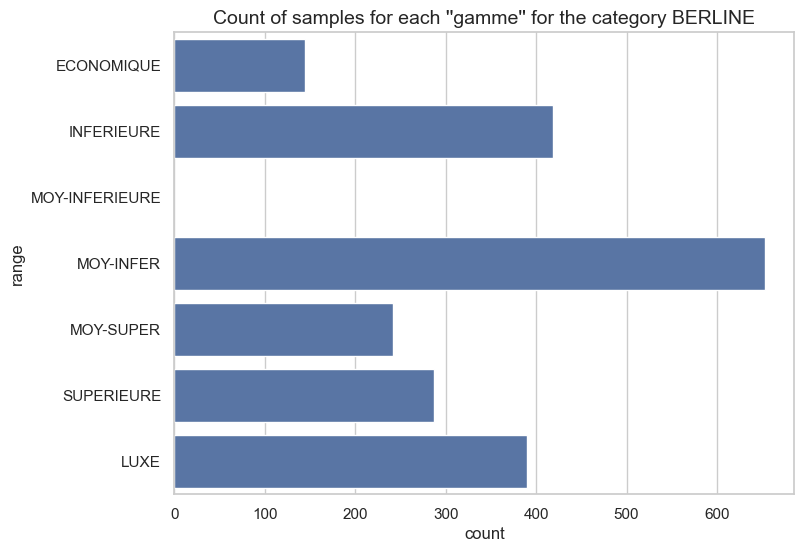

In [120]:
# Check the 'gamme' (range) while zooming in on a given 'Carrosserie' 
plt.figure(figsize=(8, 6))
sns.countplot(data=cars_df[cars_df.Carrosserie == 'BERLINE'], y='gamme', order=['ECONOMIQUE', 'INFERIEURE', 'MOY-INFERIEURE', 'MOY-INFER', 'MOY-SUPER', 'SUPERIEURE', 'LUXE'])
plt.title('Count of samples for each \'\'gamme\'\' for the category BERLINE', size=14)
plt.ylabel('range')
plt.show()

MOY-INFER and MOY-INFERIEURE are the same, so we merge them.
All the range categories are well represented in BERLINE, so we can easily compare them regarding to CO2 emissions.

In [121]:
# Merge MOY-INFER and MOY-INFERIEURE 
cars_df['gamme'] = cars_df['gamme'].str.replace('MOY-INFERIEURE', 'MOY-INFER')
print(cars_df['gamme'].unique())

['MOY-SUPER' 'LUXE' 'MOY-INFER' 'INFERIEURE' 'SUPERIEURE' 'ECONOMIQUE']


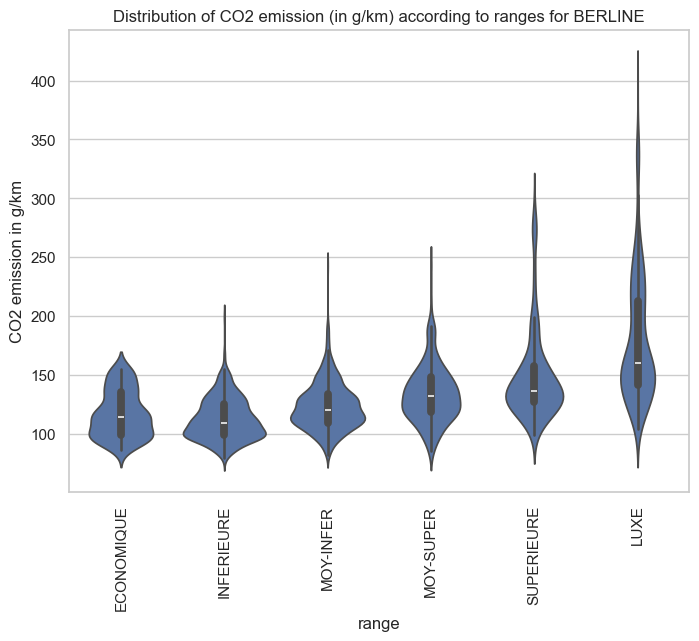

In [122]:
# Plot co2 distribution as a function of 'gamme' (range)
plt.figure(figsize=(8,6))
sns.violinplot(data=cars_df[cars_df.Carrosserie == 'BERLINE'], x='gamme', y='co2', order=['ECONOMIQUE', 'INFERIEURE', 'MOY-INFER', 'MOY-SUPER', 'SUPERIEURE', 'LUXE'])
plt.xticks(rotation=90)
plt.title('Distribution of CO2 emission (in g/km) according to ranges for BERLINE')
plt.xlabel('range')
plt.ylabel('CO2 emission in g/km')
plt.show()

We can see that, for a given Carrosserie (BERLINE), the CO2 emission increases when range increase.
LUXE category has an average of 150g/km and ECONOMIQUE and INFERIEURE around 115g/km.
LUXE has also a really wide distribution with outliers up to 400 g/km of CO2.

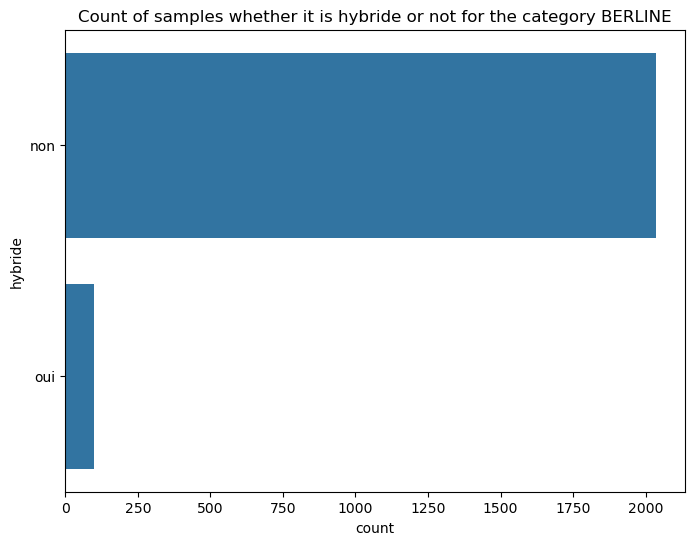

In [23]:
# Look at the 'hybride' feature for BERLINE
plt.figure(figsize=(8, 6))
sns.countplot(data=cars_df[cars_df.Carrosserie == 'BERLINE'], y='hybride')
plt.title('Count of samples whether it is hybride or not for the category BERLINE', size=12)
plt.show()

We don't have many BERLINE hybrid cars in our dataset. This could be the case with other Carrosseries.

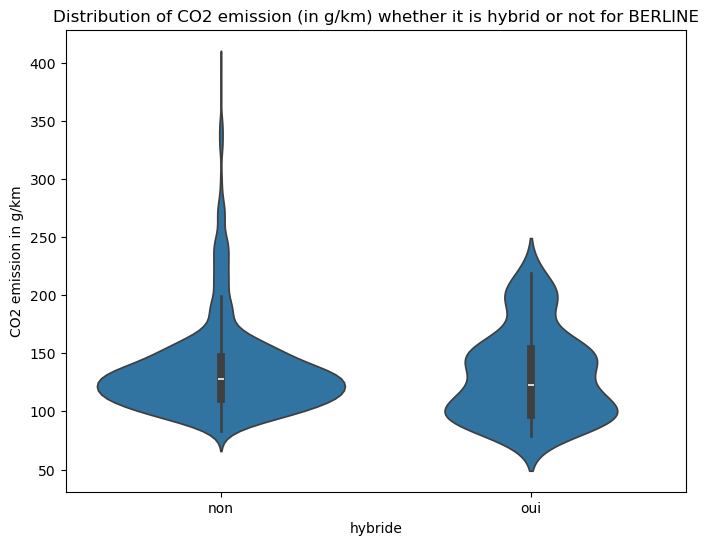

In [24]:
# Plot co2 distribution whether it is hybrid or not for BERLINE 
plt.figure(figsize=(8,6))
sns.violinplot(data=cars_df[cars_df.Carrosserie == 'BERLINE'], x='hybride', y='co2')
plt.title('Distribution of CO2 emission (in g/km) whether it is hybrid or not for BERLINE')
plt.ylabel('CO2 emission in g/km')
plt.show()

It appears that the average CO₂ emissions for BERLINE vehicles are similar regardless of whether they are hybrid or non-hybrid. However, we should be cautious in interpreting this result, as the number of hybrid samples is much smaller compared to non-hybrids.

N.B: This was a small zoom-in on the BERLINE Carrosserie, but these specifications are not necessarily generalizeable to others.

In [25]:
cars_df.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,typ_boite_nb_rapp,conso_urb,conso_exurb,co2,masse_ordma_min,champ_v9,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,M 6,11.3,5.8,182.0,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,M 6,11.5,6.0,186.0,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,M 6,6.6,4.2,134.0,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),GO,non,9,M 6,6.9,4.3,139.0,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
6,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,GO,non,9,M 6,6.6,4.3,136.0,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER


In [128]:
# Count how many rows have at least one missing value (before removal)
missing_row_count = cars_df.isnull().any(axis=1).sum()
print(f'Number of rows with missing values before removal: {missing_row_count}')
# Remove rows with missing values
cars_df.dropna(inplace=True)

# Check the resulting dataframe
display(cars_df.head(2))
print(cars_df.info())


Number of rows with missing values before removal: 0


,cod_cbr,hybride,puiss_admin_98,typ_boite_nb_rapp,conso_urb,conso_exurb,co2,Carrosserie,gamme,masse_ordma_avg,gearbox_type,num_gears
0,ES,non,12,M 6,11.3,5.8,182.0,BERLINE,MOY-SUPER,1505.0,M,6.0
1,ES,non,12,M 6,11.5,6.0,186.0,BERLINE,MOY-SUPER,1555.0,M,6.0


<class 'pandas.core.frame.DataFrame'>
Index: 8602 entries, 0 to 55043
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cod_cbr            8602 non-null   object 
 1   hybride            8602 non-null   object 
 2   puiss_admin_98     8602 non-null   int64  
 3   typ_boite_nb_rapp  8602 non-null   object 
 4   conso_urb          8602 non-null   float64
 5   conso_exurb        8602 non-null   float64
 6   co2                8602 non-null   float64
 7   Carrosserie        8602 non-null   object 
 8   gamme              8602 non-null   object 
 9   masse_ordma_avg    8602 non-null   float64
 10  gearbox_type       8602 non-null   object 
 11  num_gears          8602 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 873.6+ KB
None


In [142]:
for col in cars_df.columns:
    unique_vals = cars_df[col].unique()
    print(f"\n🟦 {col} ({len(unique_vals)} unique values):\n{unique_vals}")



🟦 cod_cbr (11 unique values):
['ES' 'GO' 'ES/GP' 'GP/ES' 'EH' 'GH' 'ES/GN' 'GN/ES' 'FE' 'GN' 'GL']

🟦 hybride (2 unique values):
['non' 'oui']

🟦 puiss_admin_98 (65 unique values):
[12  7  9 14 38  8  6  5  4 44 80 81 49 45 34 35 51 33 10 16 11 13 15 18
 17 20 21 27 19 24 48 47 23 22 31 42 25 57 41 43 26 46 50 32 60  3 53 40
 72 73 63 62 30 29 39 71 68 74 54 28 37 36 58 56 52]

🟦 typ_boite_nb_rapp (14 unique values):
['M 6' 'A 6' 'D 6' 'M 5' 'V 0' 'A 7' 'A 8' 'A 5' 'A 4' 'D 7' 'D 5' 'A 9'
 'S 6' 'M 7']

🟦 conso_urb (198 unique values):
[11.30000019 11.5         6.5999999   6.9000001   6.80000019  7.0999999
  6.69999981  9.80000019 24.39999962 11.80000019  8.39999962  7.80000019
  7.5999999   6.4000001   8.30000019 10.89999962  5.4000001   5.
  5.5        10.80000019  5.5999999   5.80000019  5.30000019  5.19999981
  4.9000001   4.4000001   4.5999999   4.30000019  5.0999999   8.19999981
 10.60000038  7.5         7.30000019  7.4000001   8.10000038  7.
 11.89999962  6.0999999  21.60000038

# Data Preprocessing

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import make_scorer, r2_score
from joblib import parallel_backend

In [130]:
# Target and features
target = "co2"
features = [
    'cod_cbr', 'hybride',
    'puiss_admin_98', 'conso_urb', 'conso_exurb',
    'gearbox_type', 'num_gears',
    'masse_ordma_avg', 'Carrosserie', 'gamme'
]
X = cars_df[features]
y =cars_df[target]

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Column types and preprocessing (unchanged)
numeric_features = ['puiss_admin_98', 'conso_urb', 'conso_exurb', 'masse_ordma_avg', 'num_gears']
categorical_features = list(set(features) - set(numeric_features))

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scorer = make_scorer(r2_score)



Starting Grid Search for Lasso...
Best params for Lasso: {'model__alpha': 0.01}
Best CV R2 for Lasso: 0.9964
Test R2 for Lasso: 0.9977
Test RMSE for Lasso: 2.4214


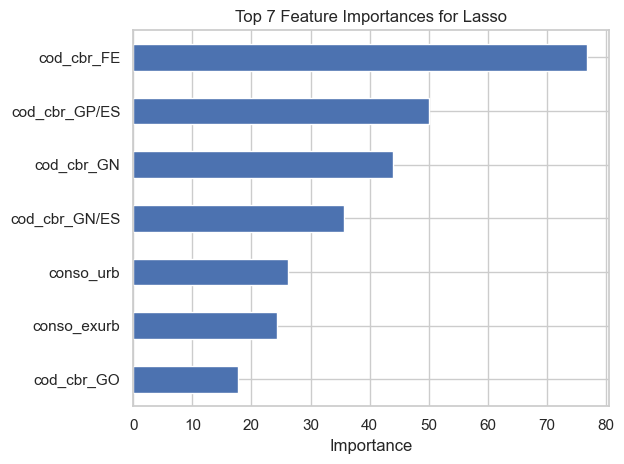


Starting Grid Search for Ridge...
Best params for Ridge: {'model__alpha': 0.1}
Best CV R2 for Ridge: 0.9968
Test R2 for Ridge: 0.9974
Test RMSE for Ridge: 2.5945


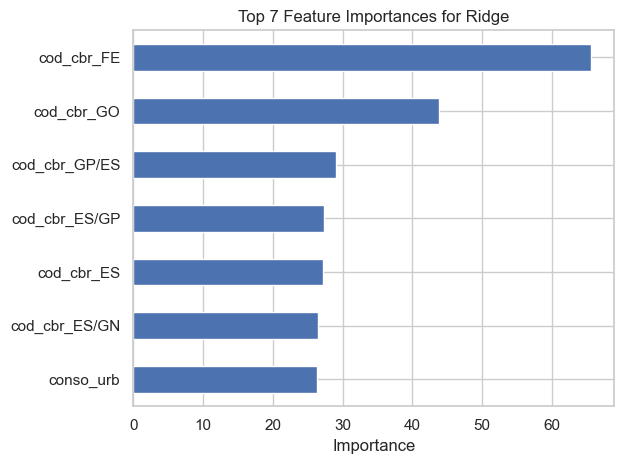


Starting Grid Search for RandomForest...
Best params for RandomForest: {'model__max_depth': None, 'model__n_estimators': 50}
Best CV R2 for RandomForest: 0.9961
Test R2 for RandomForest: 0.9985
Test RMSE for RandomForest: 1.9739


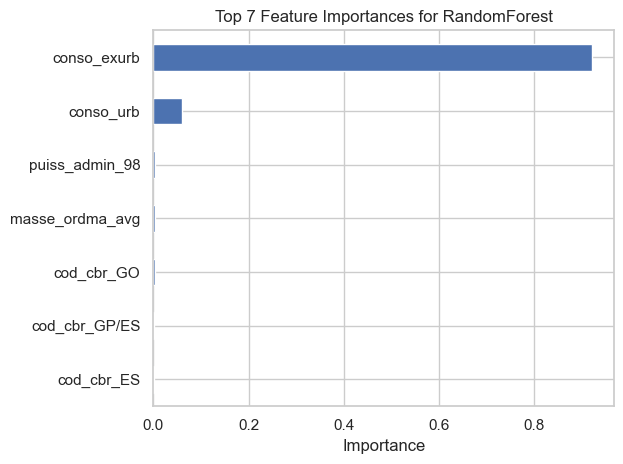


Starting Grid Search for XGBoost...
Best params for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
Best CV R2 for XGBoost: 0.9912
Test R2 for XGBoost: 0.9937
Test RMSE for XGBoost: 4.0523


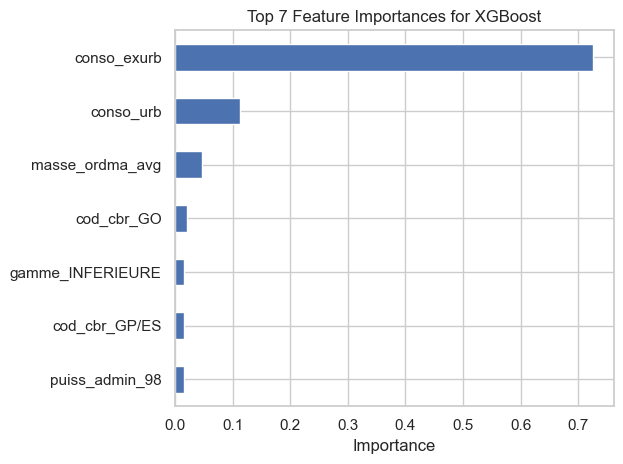


Summary of results:

| Model        | Best Params                                                                     |   Best CV R2 |   Test R2 |   Test RMSE | Top 7 Features                                                                                                                                        |
|:-------------|:--------------------------------------------------------------------------------|-------------:|----------:|------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------|
| Lasso        | {'model__alpha': 0.01}                                                          |       0.9964 |    0.9977 |      2.4214 | cod_cbr_FE (76.79), cod_cbr_GP/ES (50.07), cod_cbr_GN (43.97), cod_cbr_GN/ES (35.72), conso_urb (26.13), conso_exurb (24.26), cod_cbr_GO (17.76)      |
| Ridge        | {'model__alpha': 0.1}                                                           |    

'\n# Plot CV vs Test R2\nsns.set(style="whitegrid")\nplt.figure(figsize=(12, 6))\nsns.barplot(x="Model", y="Best CV R2", data=results_df, color="skyblue", label="CV R2")\nsns.barplot(x="Model", y="Test R2", data=results_df, color="salmon", alpha=0.7, label="Test R2")\nplt.title("Cross-Validation vs Test R² by Model")\nplt.ylabel("R² Score")\nplt.ylim(0, 1)\nplt.legend()\nplt.show()\n'

In [132]:
# Model
r2_scorer = make_scorer(r2_score)

model_params = {
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {'model__alpha': [0.01, 0.1, 1]}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'model__alpha': [0.1, 1, 10]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=1),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [None, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0, use_label_encoder=False, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [3],
            'model__learning_rate': [0.1]
        }
    }
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

def get_feature_names_from_preprocessor(preprocessor):
    feature_names = []

    # Numeric features
    try:
        feature_names.extend(preprocessor.named_transformers_['num'].feature_names_in_)
    except AttributeError:
        feature_names.extend(numeric_features)  # define numeric_features somewhere

    # Categorical features
    cat_pipe = preprocessor.named_transformers_['cat']
    try:
        cat_feature_names = cat_pipe.named_steps['encoder'].get_feature_names_out(categorical_features)  # define categorical_features somewhere
        feature_names.extend(cat_feature_names)
    except AttributeError:
        feature_names.extend(categorical_features)

    return feature_names

results = []
best_models = {}

for name, config in model_params.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=cv,
        scoring=r2_scorer,
        n_jobs=-1,
        return_train_score=True
    )

    print(f"\nStarting Grid Search for {name}...")
    with parallel_backend('threading', n_jobs=-1):
        grid.fit(X_train, y_train)

    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best CV R2 for {name}: {grid.best_score_:.4f}")

    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred_test = best_model.predict(X_test)

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    print(f"Test R2 for {name}: {test_r2:.4f}")
    print(f"Test RMSE for {name}: {test_rmse:.4f}")

    # Extract feature names correctly
    feature_names = get_feature_names_from_preprocessor(best_model.named_steps['preprocessor'])

    # Extract importances or coefficients
    if name in ['Lasso', 'Ridge']:
        coefs = best_model.named_steps['model'].coef_
        importances = pd.Series(coefs, index=feature_names).abs().sort_values(ascending=False)
    elif name in ['RandomForest', 'XGBoost']:
        feats = best_model.named_steps['model'].feature_importances_
        importances = pd.Series(feats, index=feature_names).sort_values(ascending=False)
    else:
        importances = pd.Series(dtype=float)

    # Format top 3 features as string for table
    top_feats = importances.head(7)
    top_feats_str = ", ".join([f"{feat} ({val:.2f})" for feat, val in top_feats.items()])
       
    # Plot importances
    top_feats.head(10).plot(kind='barh')
    plt.title(f"Top 7 Feature Importances for {name}")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    results.append({
        'Model': name,
        'Best Params': str(grid.best_params_),
        'Best CV R2': round(grid.best_score_, 4),
        'Test R2': round(test_r2, 4),
        'Test RMSE': round(test_rmse, 4),
        'Top 7 Features': top_feats_str
    })
results_df = pd.DataFrame(results)

print("\nSummary of results:\n")
print(results_df.to_markdown(index=False))


'''
# Plot CV vs Test R2
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Best CV R2", data=results_df, color="skyblue", label="CV R2")
sns.barplot(x="Model", y="Test R2", data=results_df, color="salmon", alpha=0.7, label="Test R2")
plt.title("Cross-Validation vs Test R² by Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.legend()
plt.show()
'''


Starting Grid Search for Lasso...
Best params for Lasso: {'model__alpha': 0.01}
Best CV R2 for Lasso: 0.9964
Test R2 for Lasso: 0.9977
Test RMSE for Lasso: 2.4214


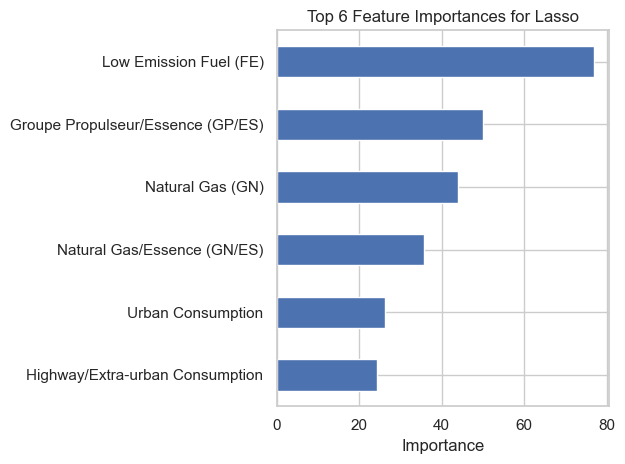


Starting Grid Search for Ridge...
Best params for Ridge: {'model__alpha': 0.1}
Best CV R2 for Ridge: 0.9968
Test R2 for Ridge: 0.9974
Test RMSE for Ridge: 2.5945


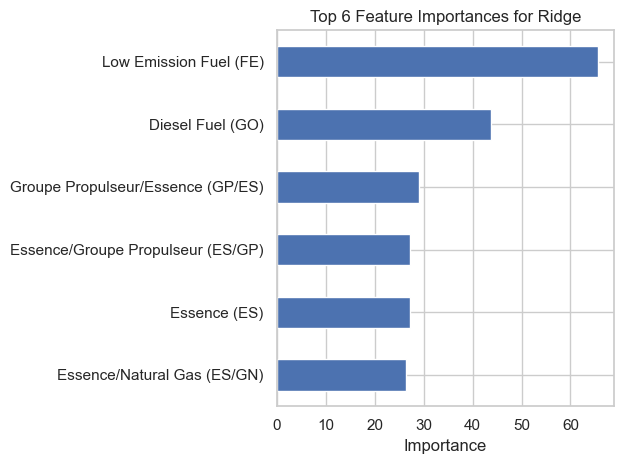


Starting Grid Search for RandomForest...
Best params for RandomForest: {'model__max_depth': None, 'model__n_estimators': 50}
Best CV R2 for RandomForest: 0.9961
Test R2 for RandomForest: 0.9985
Test RMSE for RandomForest: 1.9739


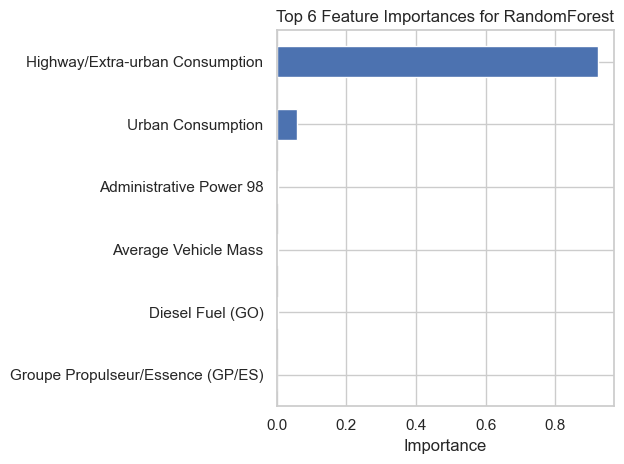


Starting Grid Search for XGBoost...
Best params for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
Best CV R2 for XGBoost: 0.9912
Test R2 for XGBoost: 0.9937
Test RMSE for XGBoost: 4.0523


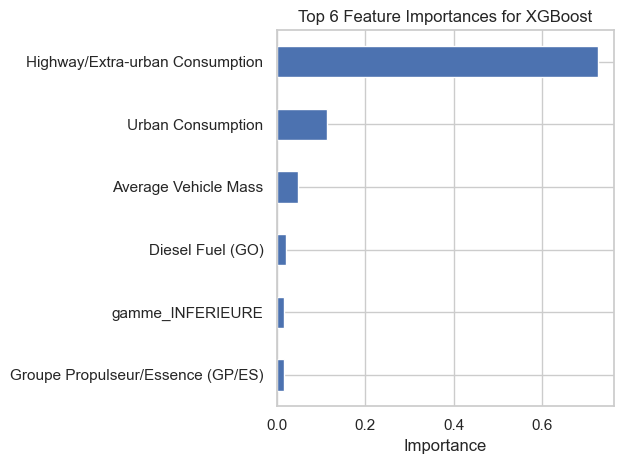


Summary of results:

| Model        | Best Params                                                                     |   Best CV R2 |   Test R2 |   Test RMSE | Top 6 Features                                                                                                                                                                                               |
|:-------------|:--------------------------------------------------------------------------------|-------------:|----------:|------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Lasso        | {'model__alpha': 0.01}                                                          |       0.9964 |    0.9977 |      2.4214 | Low Emission Fuel (FE) (76.79), Groupe Propulseur/Essence (GP/ES) (50.07), Natural Gas (GN) (43.97), Natural Gas/Essence (GN/ES) (35.72), Urban 

In [ ]:
# Add mapping for readable feature names
feature_name_mappings = {
    'cod_cbr_FE': 'Low Emission Fuel (FE)', # Faible Emission
    'cod_cbr_GP/ES': 'Groupe Propulseur/Essence (GP/ES)',
    'cod_cbr_ES/GP': 'Essence/Groupe Propulseur (ES/GP)',
    'cod_cbr_GN': 'Natural Gas (GN)',
    'conso_urb': 'Urban Consumption',
    'conso_exurb': 'Highway/Extra-urban Consumption',
    'cod_cbr_GN/ES': 'Natural Gas/Essence (GN/ES)',
    'cod_cbr_GO': 'Diesel Fuel (GO)',
    'cod_cbr_ES': 'Essence (ES)',
    'masse_ordma_avg': 'Average Vehicle Mass',
    'puiss_admin_98': 'Administrative Power 98',
    'cod_cbr_ES/GN' : 'Essence/Natural Gas (ES/GN)',
    'gamme_INFERIEUR' : 'Low Range (Gamme Inferieure)',
}

def get_feature_names_from_preprocessor(preprocessor):
    feature_names = []
    # Numeric features
    try:
        feature_names.extend(preprocessor.named_transformers_['num'].feature_names_in_)
    except AttributeError:
        feature_names.extend(numeric_features)
    # Categorical features
    cat_pipe = preprocessor.named_transformers_['cat']
    try:
        cat_feature_names = cat_pipe.named_steps['encoder'].get_feature_names_out(categorical_features)
        feature_names.extend(cat_feature_names)
    except AttributeError:
        feature_names.extend(categorical_features)
    return feature_names

r2_scorer = make_scorer(r2_score)

model_params = {
    'Lasso': {'model': Lasso(max_iter=10000), 'params': {'model__alpha': [0.01, 0.1, 1]}},
    'Ridge': {'model': Ridge(), 'params': {'model__alpha': [0.1, 1, 10]}},
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=1),
        'params': {'model__n_estimators': [50], 'model__max_depth': [None, 10]}
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0, use_label_encoder=False, eval_metric='rmse'),
        'params': {'model__n_estimators': [50], 'model__max_depth': [3], 'model__learning_rate': [0.1]}
    }
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
best_models = {}

for name, config in model_params.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=cv,
        scoring=r2_scorer,
        n_jobs=-1,
        return_train_score=True
    )

    print(f"\nStarting Grid Search for {name}...")
    with parallel_backend('threading', n_jobs=-1):
        grid.fit(X_train, y_train)

    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best CV R2 for {name}: {grid.best_score_:.4f}")

    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred_test = best_model.predict(X_test)

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    print(f"Test R2 for {name}: {test_r2:.4f}")
    print(f"Test RMSE for {name}: {test_rmse:.4f}")

    # Extract feature names correctly
    feature_names = get_feature_names_from_preprocessor(best_model.named_steps['preprocessor'])

    # Extract importances or coefficients
    if name in ['Lasso', 'Ridge']:
        coefs = best_model.named_steps['model'].coef_
        importances = pd.Series(coefs, index=feature_names).abs().sort_values(ascending=False)
    elif name in ['RandomForest', 'XGBoost']:
        feats = best_model.named_steps['model'].feature_importances_
        importances = pd.Series(feats, index=feature_names).sort_values(ascending=False)
    else:
        importances = pd.Series(dtype=float)

    # ---- RENAME FEATURE NAMES FOR PLOTTING ----
    top_feats = importances.head(6)
    top_feats.index = [feature_name_mappings.get(feat, feat) for feat in top_feats.index]

    # For the summary table
    top_feats_str = ", ".join([f"{feat} ({val:.2f})" for feat, val in top_feats.items()])

    # Plot importances
    top_feats.plot(kind='barh')
    plt.title(f"Top 6 Feature Importances for {name}")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    results.append({
        'Model': name,
        'Best Parameters': str(grid.best_params_),
        'Best CV R2': round(grid.best_score_, 4),
        'Test R2': round(test_r2, 4),
        'Test RMSE': round(test_rmse, 4),
        'Top 6 Features': top_feats_str
    })

results_df = pd.DataFrame(results)

print("\nSummary of results:\n")
print(results_df.to_markdown(index=False))


In [137]:
# Export results to CSV
results_df.to_csv('model_results.csv', index=False)


In [138]:
import joblib

for name, model_pipeline in best_models.items():
    # Save preprocessor (same for all, so can save once)
    if name == 'XGBoost':  # only save once to avoid overwriting if same preprocessor
        joblib.dump(model_pipeline.named_steps['preprocessor'], 'preprocessor.pkl')

    model = model_pipeline.named_steps['model']

    if name == 'XGBoost':
        # Save XGBoost model using native save
        model.get_booster().save_model(f'xgb_model_{name}.json')
    else:
        # Save sklearn model with joblib
        joblib.dump(model, f'model_{name}.pkl')

print("All models and preprocessor saved.")


All models and preprocessor saved.


## Trying to make the models interpretable by dropping the first category of one-hot encoded features.... this avoids perfect multicollinearity


🧾 Baseline categories (dropped by OneHotEncoder):
hybride: baseline = 'non', others = ['oui']
Carrosserie: baseline = 'BERLINE', others = ['BREAK', 'CABRIOLET', 'COMBISPACE', 'COMBISPCACE', 'COUPE', 'MINIBUS', 'MINISPACE', 'MONOSPACE', 'MONOSPACE COMPACT', 'TS TERRAINS/CHEMINS']
gearbox_type: baseline = 'A', others = ['D', 'M', 'S', 'V']
cod_cbr: baseline = 'EH', others = ['ES', 'ES/GN', 'ES/GP', 'FE', 'GH', 'GL', 'GN', 'GN/ES', 'GO', 'GP/ES']
gamme: baseline = 'ECONOMIQUE', others = ['INFERIEURE', 'LUXE', 'MOY-INFER', 'MOY-SUPER', 'SUPERIEURE']

🔍 Starting Grid Search for Lasso...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

✅ Best params for Lasso: {'model__alpha': 0.01}
✅ Best CV R2 for Lasso: 0.9964
🧪 Test R2 for Lasso: 0.9977
🧪 Test RMSE for Lasso: 2.4337


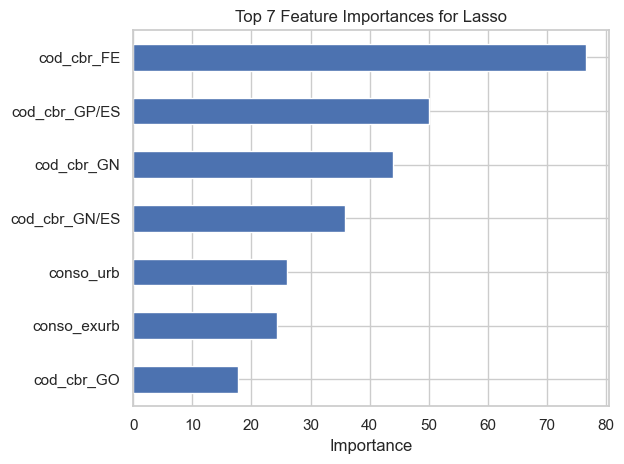


🔍 Starting Grid Search for Ridge...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

✅ Best params for Ridge: {'model__alpha': 0.1}
✅ Best CV R2 for Ridge: 0.9968
🧪 Test R2 for Ridge: 0.9974
🧪 Test RMSE for Ridge: 2.5859


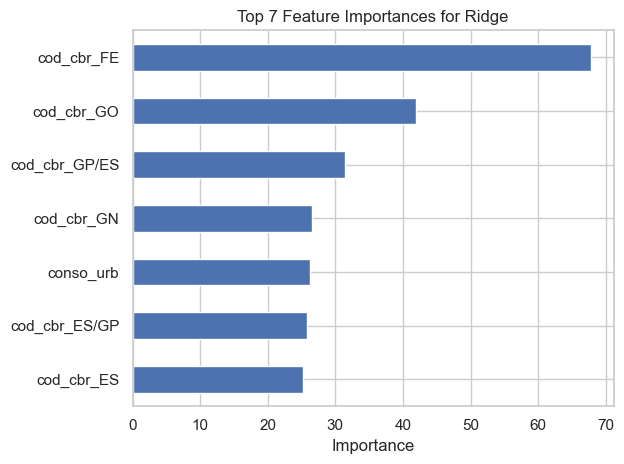


🔍 Starting Grid Search for RandomForest...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✅ Best params for RandomForest: {'model__max_depth': None, 'model__n_estimators': 50}
✅ Best CV R2 for RandomForest: 0.9958
🧪 Test R2 for RandomForest: 0.9986
🧪 Test RMSE for RandomForest: 1.9343


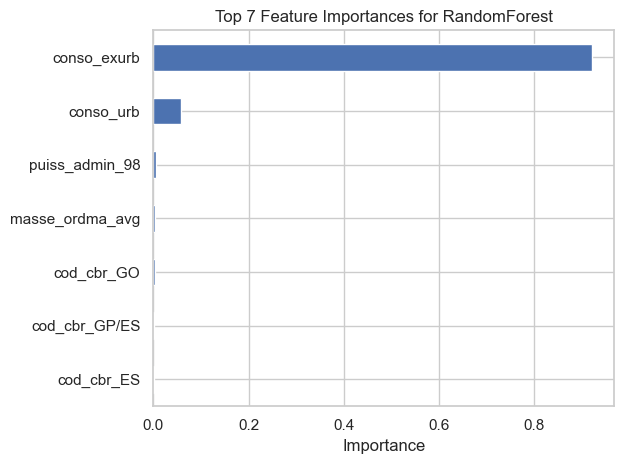


🔍 Starting Grid Search for XGBoost...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


✅ Best params for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
✅ Best CV R2 for XGBoost: 0.9914
🧪 Test R2 for XGBoost: 0.9939
🧪 Test RMSE for XGBoost: 3.9725


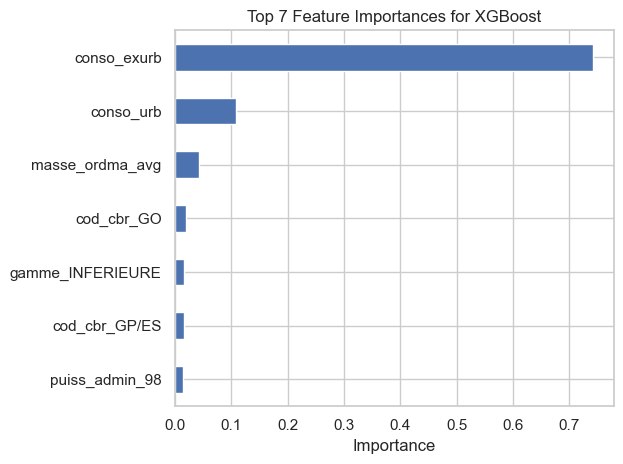


📊 Summary of results:

| Model        | Best Params                                                                     |   Best CV R2 |   Test R2 |   Test RMSE | Top 7 Features                                                                                                                                        |
|:-------------|:--------------------------------------------------------------------------------|-------------:|----------:|------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------|
| Lasso        | {'model__alpha': 0.01}                                                          |       0.9964 |    0.9977 |      2.4337 | cod_cbr_FE (76.70), cod_cbr_GP/ES (50.08), cod_cbr_GN (43.97), cod_cbr_GN/ES (35.80), conso_urb (26.07), conso_exurb (24.31), cod_cbr_GO (17.74)      |
| Ridge        | {'model__alpha': 0.1}                                                           |  

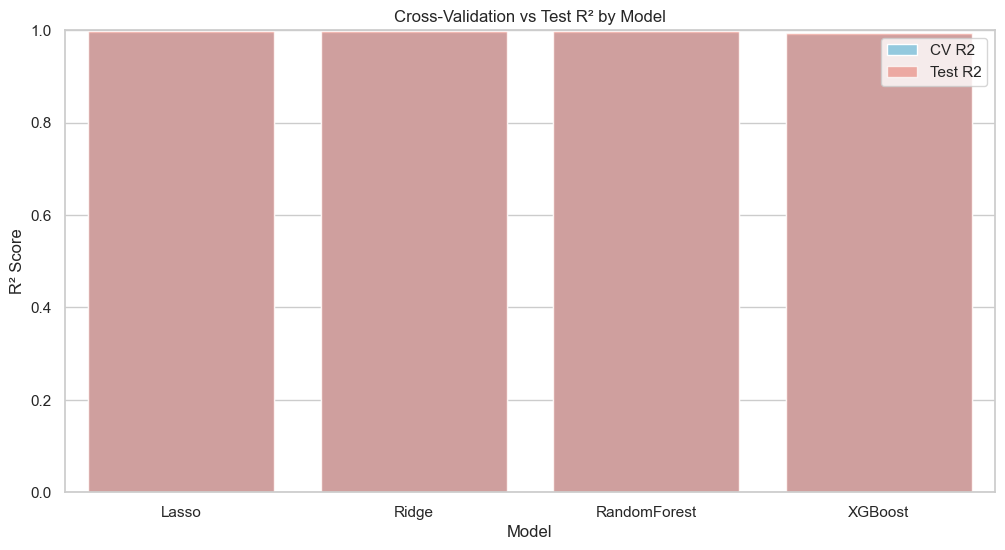

In [141]:
# Dropping the first category of each one-hot encoded feature


target = "co2"
features = [
    'cod_cbr', 'hybride',
    'puiss_admin_98', 'conso_urb', 'conso_exurb',
    'gearbox_type', 'num_gears',
    'masse_ordma_avg', 'Carrosserie', 'gamme'
]

X = cars_df[features]
y = cars_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_features = ['puiss_admin_98', 'conso_urb', 'conso_exurb', 'masse_ordma_avg', 'num_gears']
categorical_features = list(set(features) - set(numeric_features))

# === PREPROCESSING ===

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))  # drop='first' enables baseline
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# === DISPLAY BASELINE CATEGORIES ===
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
ohe.fit(X_train[categorical_features])
print("\n🧾 Baseline categories (dropped by OneHotEncoder):")
for i, col in enumerate(categorical_features):
    cats = ohe.categories_[i]
    print(f"{col}: baseline = '{cats[0]}', others = {list(cats[1:])}")

# === MODEL SETUP ===

cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scorer = make_scorer(r2_score)

model_params = {
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {'model__alpha': [0.01, 0.1, 1]}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'model__alpha': [0.1, 1, 10]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=1),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [None, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0, use_label_encoder=False, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [3],
            'model__learning_rate': [0.1]
        }
    }
}



# Add mapping for readable feature names
feature_name_mappings = {
    'cod_cbr_FE': 'Low Emission Fuel (FE)', # Faible Emission
    'cod_cbr_GP/ES': 'Groupe Propulseur/Essence (GP/ES)',
    'cod_cbr_ES/GP': 'Essence/Groupe Propulseur (ES/GP)',
    'cod_cbr_GN': 'Natural Gas (GN)',
    'conso_urb': 'Urban Consumption',
    'conso_exurb': 'Highway/Extra-urban Consumption',
    'cod_cbr_GN/ES': 'Natural Gas/Essence (GN/ES)',
    'cod_cbr_GO': 'Diesel Fuel (GO)',
    'cod_cbr_ES': 'Essence (ES)',
    'masse_ordma_avg': 'Average Vehicle Mass',
    'puiss_admin_98': 'Administrative Power 98',
    'cod_cbr_ES/GN' : 'Essence/Natural Gas (ES/GN)',
    'gamme_INFERIEUR' : 'Low Range (Gamme Inferieure)',
}


# === FEATURE NAME RETRIEVAL ===

def get_feature_names_from_preprocessor(preprocessor):
    feature_names = []

    # Numeric features
    try:
        feature_names.extend(preprocessor.named_transformers_['num'].feature_names_in_)
    except AttributeError:
        feature_names.extend(numeric_features)

    # Categorical features
    cat_pipe = preprocessor.named_transformers_['cat']
    try:
        cat_feature_names = cat_pipe.named_steps['encoder'].get_feature_names_out(categorical_features)
        feature_names.extend(cat_feature_names)
    except AttributeError:
        feature_names.extend(categorical_features)

    return feature_names

# === MODEL TRAINING & EVALUATION ===

results = []
best_models = {}

for name, config in model_params.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=cv,
        scoring=r2_scorer,
        n_jobs=-1,
        return_train_score=True
    )

    print(f"\n🔍 Starting Grid Search for {name}...")
    with parallel_backend('threading', n_jobs=-1):
        grid.fit(X_train, y_train)

    print(f"✅ Best params for {name}: {grid.best_params_}")
    print(f"✅ Best CV R2 for {name}: {grid.best_score_:.4f}")

    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred_test = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    print(f"🧪 Test R2 for {name}: {test_r2:.4f}")
    print(f"🧪 Test RMSE for {name}: {test_rmse:.4f}")

    # Feature importances / coefficients
    feature_names = get_feature_names_from_preprocessor(best_model.named_steps['preprocessor'])

    if name in ['Lasso', 'Ridge']:
        coefs = best_model.named_steps['model'].coef_
        importances = pd.Series(coefs, index=feature_names).abs().sort_values(ascending=False)
    elif name in ['RandomForest', 'XGBoost']:
        feats = best_model.named_steps['model'].feature_importances_
        importances = pd.Series(feats, index=feature_names).sort_values(ascending=False)
    else:
        importances = pd.Series(dtype=float)

    # Top features
    top_feats = importances.head(7)
    top_feats_str = ", ".join([f"{feat} ({val:.2f})" for feat, val in top_feats.items()])

    # Plot top importances
    top_feats.plot(kind='barh')
    plt.title(f"Top 7 Feature Importances for {name}")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    results.append({
        'Model': name,
        'Best Params': str(grid.best_params_),
        'Best CV R2': round(grid.best_score_, 4),
        'Test R2': round(test_r2, 4),
        'Test RMSE': round(test_rmse, 4),
        'Top 7 Features': top_feats_str
    })

# === RESULTS SUMMARY ===

results_df = pd.DataFrame(results)

print("\n📊 Summary of results:\n")
print(results_df.to_markdown(index=False))

# === OPTIONAL PLOT: CV vs TEST R2 ===

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Best CV R2", data=results_df, color="skyblue", label="CV R2")
sns.barplot(x="Model", y="Test R2", data=results_df, color="salmon", alpha=0.7, label="Test R2")
plt.title("Cross-Validation vs Test R² by Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.legend()
plt.show()


